In [1]:
%matplotlib inline


# One neuron example

This script simulates a neuron driven by a constant external current
and records its membrane potential.

## See Also

:doc:`twoneurons`


First, we import all necessary modules for simulation, analysis and
plotting. Additionally, we set the verbosity to suppress info
messages and reset the kernel.
Resetting the kernel allows you to execute the script several
times in a Python shell without interferences from previous NEST
simulations. Thus, without resetting the kernel the network status
including connections between nodes, status of neurons, devices and
intrinsic time clocks, is kept and influences the next simulations.



In [2]:
import nest
import nest.voltage_trace
import matplotlib.pyplot as plt

nest.set_verbosity("M_WARNING")
nest.ResetKernel()

Second, the nodes (neurons and devices) are created using ``Create``.
We store the returned handles in variables for later reference.
The ``Create`` function also allow you to create multiple nodes
e.g. ``nest.Create('iaf_psc_alpha',5)``
Also default parameters of the model can be configured using ``Create``
by including a list of parameter dictionaries
e.g. `nest.Create("iaf_psc_alpha", params=[{'I_e':376.0}])`.
In this example we will configure these parameters in an additional
step, which is explained in the third section.



In [10]:
neuron = nest.Create("iaf_psc_alpha", params=[{'I_e':376.0}])
voltmeter = nest.Create("voltmeter")

Third, we set the external current of the neuron.



In [11]:
print(neuron)

(3,)


In [12]:
neuron.I_e = 376.0

AttributeError: 'tuple' object has no attribute 'I_e'

Fourth, the neuron is connected to the voltmeter. The command
``Connect`` has different variants. Plain ``Connect`` just takes the
handles of pre- and postsynaptic nodes and uses the default values
for weight and delay. Note that the connection direction for the voltmeter is
reversed compared to the spike recorder, because it observes the
neuron instead of receiving events from it. Thus, ``Connect``
reflects the direction of signal flow in the simulation kernel
rather than the physical process of inserting an electrode into the
neuron. The latter semantics is presently not available in NEST.



In [13]:
nest.Connect(voltmeter, neuron)

Now we simulate the network using ``Simulate``, which takes the
desired simulation time in milliseconds.



In [14]:
nest.Simulate(1000.0)

Finally, we plot the neuron's membrane potential as a function of
time and display the plot using pyplot.



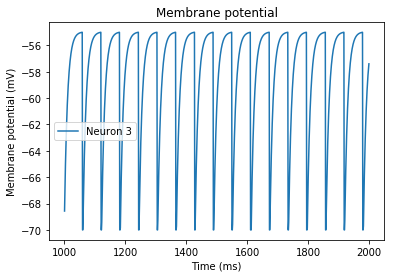

In [15]:
nest.voltage_trace.from_device(voltmeter)
plt.show()